<a href="https://colab.research.google.com/github/divypandya/OpenCV-with-Python-Course/blob/master/Basics_of_Image_Processing_with_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import imutils
import cv2
from google.colab.patches import cv2_imshow



---

**Basic Image Operations**


---



In [0]:
# Loading and Displaying image
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
image = cv2.imread('drive/My Drive/Colab Notebooks/CV Tutorials/images/jp.png')
(h,w,d) = image.shape
print('Height: {}, Width: {}, Depth: {}'.format(h,w,d))
# display the image to our screen -- we will need to click the window
# open by OpenCV and press a key on our keyboard to continue execution
cv2_imshow(image)
# access the RGB pixel located at x=50, y=100, keepind in mind that
# OpenCV stores images in BGR order rather than RGB
(B, G, R) = image[100,50]
print('B: {}, G: {}, R: {}'.format(G,B,R))

In [0]:
# Array Slicing and Cropping
# Region of Interest or ROI
# extract a 100x100 pixel square ROI (Region of Interest) from the
# input image starting at x=320,y=60 at ending at x=420,y=160
ROI = image[60:160, 320:420]
cv2_imshow(ROI)

In [0]:
# Resizing Image
# resize the image to 200x200px, ignoring aspect ratio
resized = cv2.resize(image, (200, 200))
cv2_imshow(resized)
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
r = 300.0/w
dim = (300, int(h*r))
resize2 = cv2.resize(image, dim)
cv2_imshow(resize2)
# instead of manually calculating aspect ratio every time 
# we can just simply use imutils lib
resized3 = imutils.resize(image, height = 300)
cv2_imshow(resized3)

In [0]:
# Rotating an Image
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2_imshow(rotated)
# or hail lord adrian rosebrock
rotated2 = imutils.rotate(image, -45)
cv2_imshow(rotated2)
#
# OpenCV doesn't "care" if our rotated image is clipped after rotation
# so we can instead use another imutils convenience function to help
# us out
rotated3 = imutils.rotate_bound(image, 45)
cv2_imshow(rotated3)



---

**Smoothing An Image**


---



In [0]:
# Using Gaussian Blur
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2_imshow(blurred)



---

**Drawing on an Image**


---



In [0]:
# draw a 2px thick red rectangle surrounding the face
output = image.copy()
cv2.rectangle(output, (320,60), (420, 160), (0, 0, 255), 2)
cv2_imshow(output)

# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
# The line thickness. Since I supplied a negative value ( -1 ), 
# the circle is solid/filled in.
cv2_imshow(output)

# draw a 5px thick red line from x=60,y=20 to x=400,y=200
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
cv2_imshow(output)

# draw green text on the image
output = image.copy()
cv2.putText(output, 'OpenCV + Jurassic Park', (10, 25), 
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2
        )
cv2_imshow(output)



---


---



**Counting Objects**


---


---








**Converting RGB image to GrayScale Image**


---



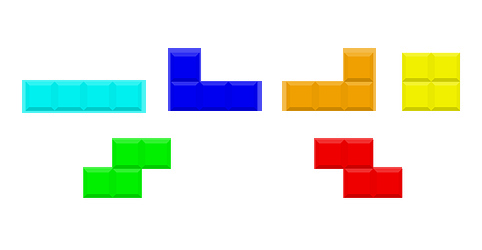

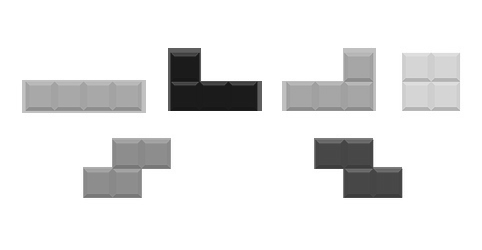

In [37]:
# loading and displaying Image
args = {'input' : 'drive/My Drive/Colab Notebooks/CV Tutorials/images/tetris_blocks.png'}
image = cv2.imread(args['input'])
cv2_imshow(image)

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

**Edge Detection**


---



In [0]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, 30, 150)
cv2_imshow(edged)

**Thresholding**


---



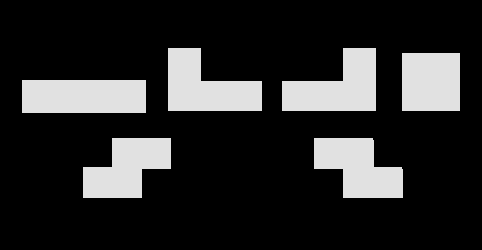

In [46]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 0
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 225, 225, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)

**Detecting and Drawing Contours**


---



In [0]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                       cv2.CHAIN_APPROX_SIMPLE
                       )
cnts = imutils.grab_contours(cnts)
output = image.copy()

# loop over the contours
for c in cnts:
    # draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
    cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
    cv2_imshow(output)

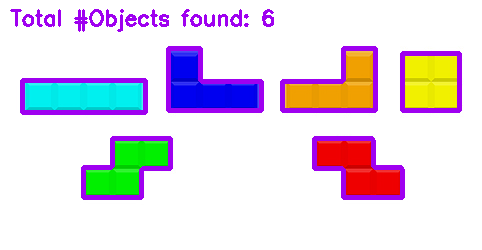

In [48]:
# draw the total number of contours found in purple
text = 'Total #Objects found: {}'.format(len(cnts))
cv2.putText(output, text, (10,25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (240, 0, 159), 2)
cv2_imshow(output)

**Erosion and Dilation**


---



In [0]:
# we apply erosions to reduce the size of foreground objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
cv2_imshow(mask)

# similarly, dilations can increase the size of the ground objects
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
cv2_imshow(mask)

**Masking and Bitwise Operations**


---



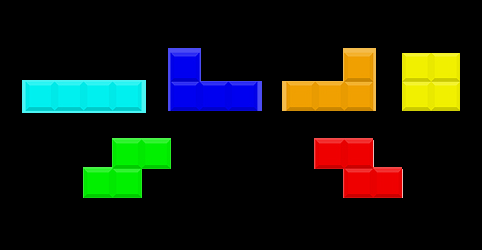

In [52]:
# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked
# regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask = mask)
cv2_imshow(output)